## Práctica Propuesta- SimPy SED

Modifique el código a fin de incorporar los siguientes cambios:

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 15- 20 minutos
    * Automóvil: 7-10 minutos
    * Furgoneta: 12-15 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Identificar el recurso maquina dentro de la simulación
* Realice una gráfica comparativa de la simulación con 3 y con 4 máquinas de lavado
* Generar llegada de vehiculos de 1 - 2 minutos, por 60 minutos de lavado, el tipo de vehiculo es generado aleatorialmente.


In [8]:
import simpy
import random
import matplotlib.pyplot as plt


# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3

# Intervalo de tiempo en que llegan vehiculos (minutos)


# Tiempo de simulación
TIEMPO_SIMULACION = 60 # Cambio de tiempo a 60 mins

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
# Esto permite graficar o generar los resultados
tiempo={}
res = [3,2,1]
class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        


        
    def lavar_vehiculo(self, vehiculo):
        # Este metodo representa el proceso de lavado del vehículo.
        # Se ingresa el vehículo y se lava
        
        # Simulamos el tiempo que tarda en lavarse el vehiculo
        # Es importante notar que la instruccion "yield" es distinta de "sleep"
        # ya que esta ultima bloquea el hilo de ejecucion durante 't' unidades de tiempo,
        # mientras que 'yield' no bloquea el hilo de ejecucion, solo lo suspende mientras
        # el evento de 'lavado' se realice


        #Definicion de tiempso de lavado    #Floro
        if "Bus" in vehiculo: 
            yield self.env.timeout(random.randint(15,20))
            print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        elif "Automóvil" in vehiculo: 
            yield self.env.timeout(random.randint(7,10))
            print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        elif "Furgoneta" in vehiculo: 
            yield self.env.timeout(random.randint(12,15))
            print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))

       
        
        
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        
        
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('En recepcion : %s a la hora %.2f.' % (nombre, env.now))

    if "Bus" in nombre: 
        yield env.timeout(4)
        print('Llega a la máquina de lavado: %s a la hora %.2f.' % (nombre, env.now))
    elif "Automóvil" in nombre: 
        yield env.timeout(1)
        print('Llega a la máquina de lavado: %s a la hora %.2f.' % (nombre, env.now))
    elif "Furgoneta" in nombre: 
        yield env.timeout(2)
        print('Llega a la máquina de lavado: %s a la hora %.2f.' % (nombre, env.now))


    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    

    with lavanderia.maquinas.request() as maquina:

        
        
        

        # Ocupamos la maquina de lavado
        yield maquina
        numActual=res.pop()
        # Indicamos que vehiculo entra a la lavanderia
        print('Lavandose: %s a la hora %.2f en la Maquina %s.' % (nombre, env.now, numActual))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f en la Maquina %s.' % (nombre, env.now, numActual))
        res.append(numActual)


        # --> Agegamos al diccionario para obtener los tiempos de lavado
        k=env.now # Permite obtener el tiempo actual de la simulación para generar la clave del diccionario
    
    if k in tiempo:
        tiempo[k]=tiempo[k]+1 # Aumento el numero de autos en el tiempo de salida
    else:
        tiempo[k]=1 # Por defecto empezamos con el primer vehiculo





#Funcion para Generar autos -Floro
def generar_auto():
    tipos = ["Bus","Automóvil","Furgoneta"]
    num = random.randint(0,2)
    return tipos[num]





def ejecutar_simulacion(env, num_maquinas):
    lavanderia=Lavanderia(env, num_maquinas)
    
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):                      #Floro
        env.process(llegada_vehiculo(env, str(generar_auto())+'-%d'%(i+1),lavanderia))
    
    # Ejecutamos la simulacion
    while True:                  #Floro Intervalo de 1 a 2 
        yield env.timeout(random.randint(1, 2))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
                                               #Floro
        env.process(llegada_vehiculo(env,str(generar_auto())+'-%d'%(i+1),lavanderia))






print('Lavanderia UPS - Floro')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

print(tiempo)
# Generamos una grafica en base al diccionario del tiempo


Lavanderia UPS - Floro
En recepcion : Automóvil-1 a la hora 0.00.
En recepcion : Automóvil-2 a la hora 0.00.
En recepcion : Bus-3 a la hora 0.00.
En recepcion : Bus-4 a la hora 0.00.
En recepcion : Bus-5 a la hora 0.00.
En recepcion : Automóvil-6 a la hora 1.00.
Llega a la máquina de lavado: Automóvil-1 a la hora 1.00.
Llega a la máquina de lavado: Automóvil-2 a la hora 1.00.
Lavandose: Automóvil-1 a la hora 1.00 en la Maquina 1.
Lavandose: Automóvil-2 a la hora 1.00 en la Maquina 2.
Llega a la máquina de lavado: Automóvil-6 a la hora 2.00.
Lavandose: Automóvil-6 a la hora 2.00 en la Maquina 3.
En recepcion : Automóvil-7 a la hora 3.00.
Llega a la máquina de lavado: Bus-3 a la hora 4.00.
Llega a la máquina de lavado: Bus-4 a la hora 4.00.
Llega a la máquina de lavado: Bus-5 a la hora 4.00.
En recepcion : Automóvil-8 a la hora 4.00.
Llega a la máquina de lavado: Automóvil-7 a la hora 4.00.
En recepcion : Bus-9 a la hora 5.00.
Llega a la máquina de lavado: Automóvil-8 a la hora 5.00.
En 

In [12]:
NUM_MAQUINAS = 4
tiempo2={}
res = [4,3,2,1]
class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        
    def lavar_vehiculo(self, vehiculo):
        # Este metodo representa el proceso de lavado del vehículo.
        # Se ingresa el vehículo y se lava
        
        # Simulamos el tiempo que tarda en lavarse el vehiculo
        # Es importante notar que la instruccion "yield" es distinta de "sleep"
        # ya que esta ultima bloquea el hilo de ejecucion durante 't' unidades de tiempo,
        # mientras que 'yield' no bloquea el hilo de ejecucion, solo lo suspende mientras
        # el evento de 'lavado' se realice


        #Definicion de tiempso de lavado    #Floro
        if "Bus" in vehiculo: 
            yield self.env.timeout(random.randint(15,20))
            print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        elif "Automóvil" in vehiculo: 
            yield self.env.timeout(random.randint(7,10))
            print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        elif "Furgoneta" in vehiculo: 
            yield self.env.timeout(random.randint(12,15))
            print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))

       
        
        
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        
        
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('En recepcion : %s a la hora %.2f.' % (nombre, env.now))

    if "Bus" in nombre: 
        yield env.timeout(4)
        print('Llega a la máquina de lavado: %s a la hora %.2f.' % (nombre, env.now))
    elif "Automóvil" in nombre: 
        yield env.timeout(1)
        print('Llega a la máquina de lavado: %s a la hora %.2f.' % (nombre, env.now))
    elif "Furgoneta" in nombre: 
        yield env.timeout(2)
        print('Llega a la máquina de lavado: %s a la hora %.2f.' % (nombre, env.now))


    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    

    with lavanderia.maquinas.request() as maquina:


        # Ocupamos la maquina de lavado
        yield maquina
        # Indicamos que vehiculo entra a la lavanderia
        numActual=res.pop()
        print('Lavandose: %s a la hora %.2f en la Maquina %s.' % (nombre, env.now, numActual))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f en la Maquina %s.' % (nombre, env.now, numActual))
        res.append(numActual)

        # --> Agegamos al diccionario para obtener los tiempos de lavado
        k=env.now # Permite obtener el tiempo actual de la simulación para generar la clave del diccionario
    
    if k in tiempo2:
        tiempo2[k]=tiempo2[k]+1 # Aumento el numero de autos en el tiempo de salida
    else:
        tiempo2[k]=1 # Por defecto empezamos con el primer vehiculo





#Funcion para Generar autos -Floro
def generar_auto():
    tipos = ["Bus","Automóvil","Furgoneta"]
    num = random.randint(0,2)
    return tipos[num]





def ejecutar_simulacion(env, num_maquinas):
    lavanderia=Lavanderia(env, num_maquinas)
    
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):                      #Floro
        env.process(llegada_vehiculo(env, str(generar_auto())+'-%d'%(i+1),lavanderia))
    
    # Ejecutamos la simulacion
    while True:                  #Floro Intervalo de 1 a 2 
        yield env.timeout(random.randint(1, 2))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
                                               #Floro
        env.process(llegada_vehiculo(env,str(generar_auto())+'-%d'%(i+1),lavanderia))






print('Lavanderia UPS - Floro')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

print(tiempo2)
# Generamos una grafica en base al diccionario del tiempo


Lavanderia UPS - Floro
En recepcion : Automóvil-1 a la hora 0.00.
En recepcion : Automóvil-2 a la hora 0.00.
En recepcion : Bus-3 a la hora 0.00.
En recepcion : Bus-4 a la hora 0.00.
En recepcion : Bus-5 a la hora 0.00.
En recepcion : Automóvil-6 a la hora 1.00.
Llega a la máquina de lavado: Automóvil-1 a la hora 1.00.
Llega a la máquina de lavado: Automóvil-2 a la hora 1.00.
Lavandose: Automóvil-1 a la hora 1.00 en la Maquina 1.
Lavandose: Automóvil-2 a la hora 1.00 en la Maquina 2.
Llega a la máquina de lavado: Automóvil-6 a la hora 2.00.
Lavandose: Automóvil-6 a la hora 2.00 en la Maquina 3.
En recepcion : Automóvil-7 a la hora 3.00.
Llega a la máquina de lavado: Bus-3 a la hora 4.00.
Llega a la máquina de lavado: Bus-4 a la hora 4.00.
Llega a la máquina de lavado: Bus-5 a la hora 4.00.
En recepcion : Automóvil-8 a la hora 4.00.
Llega a la máquina de lavado: Automóvil-7 a la hora 4.00.
Lavandose: Bus-3 a la hora 4.00 en la Maquina 4.
En recepcion : Furgoneta-9 a la hora 5.00.
Llega 

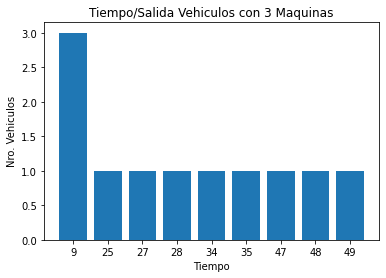

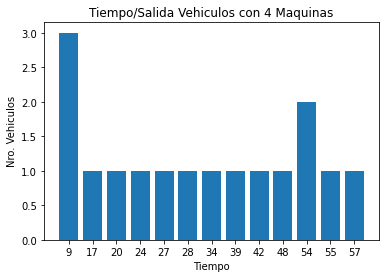

In [13]:
etiqueta = list(tiempo.keys())
valores = list(tiempo.values())
plt.bar(range(len(tiempo)), valores, align="center", tick_label=etiqueta)
plt.title("Tiempo/Salida Vehiculos con 3 Maquinas")
plt.xlabel("Tiempo")
plt.ylabel("Nro. Vehiculos")
plt.show()



etiqueta = list(tiempo2.keys())
valores = list(tiempo2.values())
plt.bar(range(len(tiempo2)), valores, align="center", tick_label=etiqueta)
plt.title("Tiempo/Salida Vehiculos con 4 Maquinas")
plt.xlabel("Tiempo")
plt.ylabel("Nro. Vehiculos")
plt.show()